In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pysynphot as S
from scipy.interpolate import interp1d
from astropy.io import fits

# allow interactive plots
%matplotlib widget

In [4]:
colour_dict = np.load('colour_dict.npy',allow_pickle=True).ravel()[0]
colour_dict_ref = np.load('colour_dict_ref.npy',allow_pickle=True).ravel()[0]

In [20]:
atm_vals = np.load('atm_vals_pwv_airmass_1.2_cloud_0.0.npy',allow_pickle=True).ravel()

In [22]:
spectral_types = ['O','B','A','F','G','K','M']
type_markers = {'O':'s','B':'x','A':'o','F':'v','G':'^','K':'P','M':'*'}

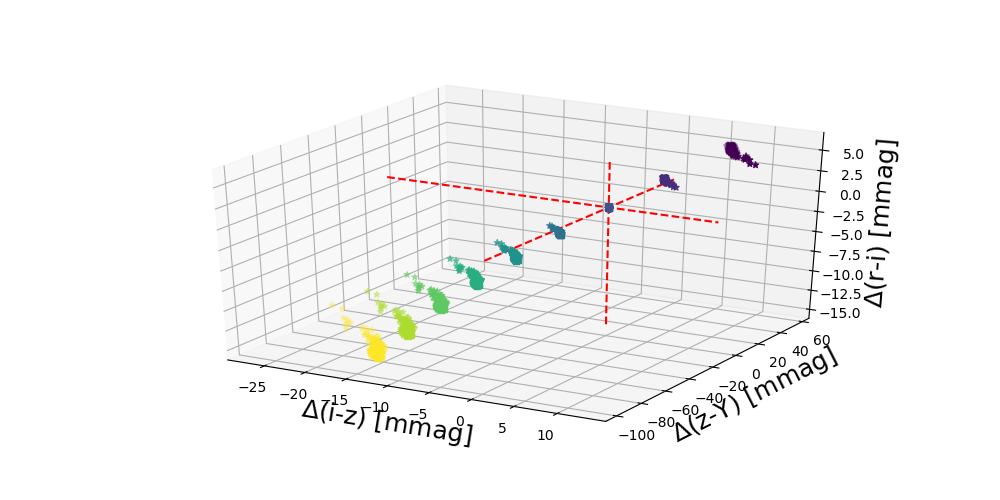

In [23]:
colorx = 'i-z'
colory = 'z-Y'
colorz = 'r-i'

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

minx, maxx = [], []
miny, maxy = [], []
minz, maxz = [], []
for spec_type in spectral_types:
    for si in colour_dict[spec_type]:
        delta1 = (colour_dict[spec_type][si][colorx.lower()]-colour_dict_ref[spec_type][si][colorx.lower()])*1000.
        delta2 = (colour_dict[spec_type][si][colory.lower()]-colour_dict_ref[spec_type][si][colory.lower()])*1000.
        delta3 = (colour_dict[spec_type][si][colorz.lower()]-colour_dict_ref[spec_type][si][colorz.lower()])*1000.

        ax.scatter(delta1,delta2,delta3,c=atm_vals,marker=type_markers[spec_type])
        minx.append(np.min(delta1))
        miny.append(np.min(delta2))
        minz.append(np.min(delta3))
        maxx.append(np.max(delta1))
        maxy.append(np.max(delta2))
        maxz.append(np.max(delta3))

ax.set_xlabel(r'$\Delta$'+'('+colorx+') [mmag]',fontsize=18)
ax.set_ylabel(r'$\Delta$'+'('+colory+') [mmag]',fontsize=18)
ax.set_zlabel(r'$\Delta$'+'('+colorz+') [mmag]',fontsize=18)

xrange = np.linspace(np.min(minx),np.max(maxx),100)
yrange = np.linspace(np.min(miny),np.max(maxy),100)
zrange = np.linspace(np.min(minz),np.max(maxz),100)

ax.plot(xrange,np.zeros(len(yrange)),np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),yrange,np.zeros(len(zrange)),'r--')
ax.plot(np.zeros(len(xrange)),np.zeros(len(yrange)),zrange,'r--')
